
## Capstone Project Pharmaceutical Drugs Sentiment Analysis

**Project Background**
- Sentiment analysis can extensively enhance the way we look at the data and customer opinions, with benefits of reduced manual effort. Sentiment  Analysis is used in a wide variety of industries and can also help rich pharma companies to easily work with huge amounts of unstructured data to gain useful insights regarding their products. 

**Problem Statement**
- You are the lead Data Scientist for Pharmaceutical company Kipla, they have collected comments for various products scraping from various online sources and wish to create a sentiment analysis engine that can track the sentiment regarding a specified drug from 3 categories namely positive negative and neutral. Every sample will contain the text mentioning a drug name and the comment pertaining to it. Multiple products could be there within a single comment 

### Data Secription

- train.csv Comments with actual labels

- Variables included in dataset : id, comment, product, sentiment 

- test.csv: Participants are expected to predict the sentiment for the products mentioned with comments in the test set

- sample_submission.csv: sample_submission.csv contains the submission format for the predictions against the test set.  The submission file must contain only 2 columns <id>,<sentiment>. 



### Evaluation Metric

- The metric used for evaluating the performance of the classification model would be macro F1-Score.  

- Public and Private Split : The texts in the test data are further randomly divided into Public (40%) and Private (60%) data.

- Your initial responses will be checked and scored on the Public data.

- The final rankings would be based on your private score which will be published once the competition is over. 

- Code Submission
- Setting the final submission is recommended. Without a final submission, the submission corresponding to best public score will be taken as the final submission
- Code file are mandatory while setting final submission. For GUI based tools, please upload a zip file of snapshots of steps taken
 

### 1. Import required libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2. Data Understanding

In [75]:
pd.pandas.set_option('display.max_rows',None)
data = pd.read_csv('train_F3WbcTw_1icmK82.csv')
data.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [76]:
data.shape

(5279, 4)

In [77]:
print('Total unique values in unique_hash is {}'.format(len(np.unique(data['unique_hash']))))

Total unique values in unique_hash is 5279


In [78]:
data.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [79]:
data['drug'].value_counts()

ocrevus                         676
gilenya                         666
ocrelizumab                     441
entyvio                         303
humira                          270
fingolimod                      238
remicade                        229
opdivo                          224
tarceva                         218
cladribine                      200
keytruda                        199
tagrisso                        161
stelara                         161
alimta                          146
lucentis                         67
eylea                            65
avastin                          52
nivolumab                        50
cimzia                           48
crizotinib                       43
alectinib                        43
vitrectomy                       41
simponi                          39
erlotinib                        35
tecentriq                        34
xalkori                          33
pemetrexed                       33
tysabri                     

### 3. Data Exploration


#### Now Sort high value counts ('drug')

In [80]:
data = data[(data['drug']=='ocrevus')|(data['drug']=='gilenya')|(data['drug']=='ocrelizumab')|(data['drug']=='entyvio')|(data['drug']=='humira')|(data['drug']=='fingolimod')|(data['drug']=='remicade')|(data['drug']=='opdivo')|(data['drug']=='tarceva')|(data['drug']=='cladribine')]

In [81]:
data.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


#### Now segregate dataframe 'data' to analyze individual condition relared to the drug

In [82]:
data_ocrevus = data[(data['drug'] == 'ocrevus')]
data_gilenya = data[(data['drug']=='gilenya')]
data_ocrelizumab = data[(data['drug']=='ocrelizumab')]
data_entyvio = data[(data['drug']=='entyvio')]
data_humira = data[(data['drug']=='humira')]
data_fingolimod = data[(data['drug']=='fingolimod')]
data_remicade = data[(data['drug']=='remicade')]
data_opdivo = data[(data['drug']=='opdivo')]
data_tarceva = data[(data['drug']=='tarceva')]
data_cladribine = data[(data['drug']=='cladribine')]

#### Now get wordcolud view 

Text(0.5, 1.0, 'Word cloud for ocrevus')

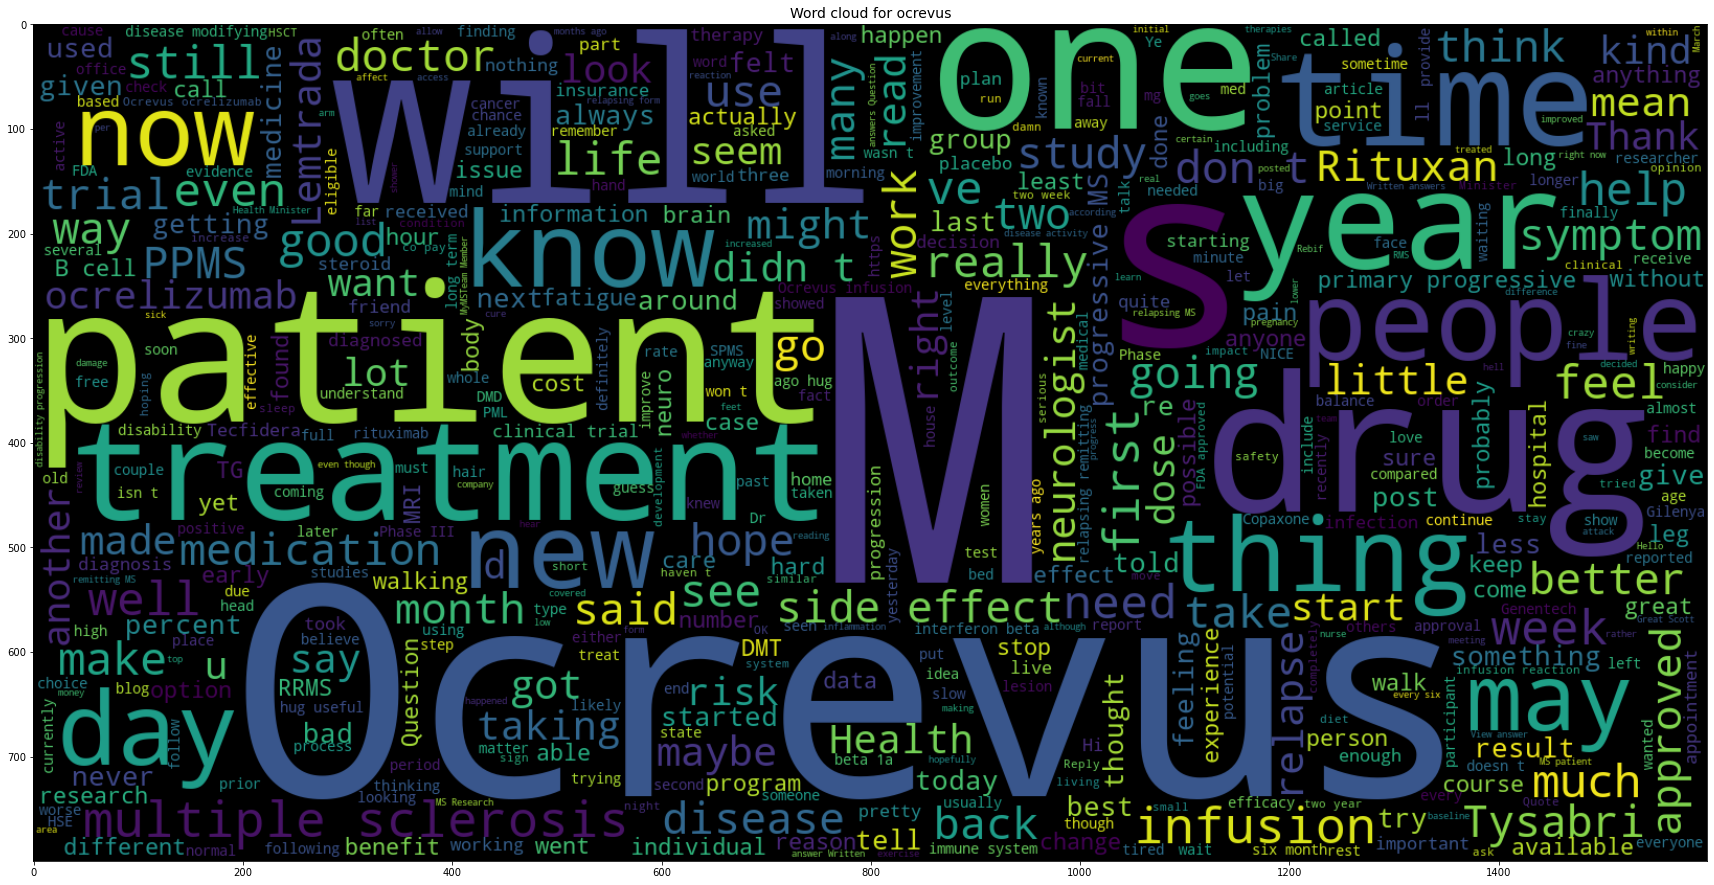

In [83]:
from wordcloud import WordCloud
plt.figure(figsize = (30,30)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(data_ocrevus.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for ocrevus',fontsize=14)

In [84]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 4. Text Preprocessing

In [85]:
def clean_data(raw_data):
    #1. Delete HTML
    text = BeautifulSoup(raw_data, 'html.parser').get_text()
    #2. Create a space
    text = re.sub('[^a-zA-Z]', ' ', text)
    #3. Lower letters
    text = text.lower().split()
    #4. Stopwords
    meaningful_text = [ w for w in text if not w in stop]
    #5. Lemmitization
    lemmatizer = WordNetLemmatizer()
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_text]
    #6. with space join in words
    return(' '.join(lemmitize_words))

In [86]:
data['revised_text'] = data['text'].apply(clean_data)

In [87]:
data.head()

,unique_hash,text,drug,sentiment,revised_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,autoimmune disease tend come cluster gilenya f...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,completely understand want try result reported...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,interesting target p receptor rather like fing...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,interesting grand merci wonder lemtrada ocrevu...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,hi everybody latest mri result brain cervical ...


### 5. Feature Engineering

In [88]:
# First we will do seperation of features ( dependant and independant)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['ocrevus','gilenya','ocrelizumab','entyvio','humira','fingolimod','remicade','opdivo','tarceva','cladribine'])
data['drug'] = le.transform(data['drug'])

### 6. Test Train Split of the data

In [89]:
x = data['revised_text']
y = data['drug']

#### Split the data into train and test sets

In [90]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)
print(f'Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}')

Rows in train set: 2945
Rows in test set: 520


#### Split the data into train and validation sets

In [91]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.15, random_state = 42)
print(f'Rows in train set: {len(x_train)}\nRows in valid set: {len(x_valid)}')

Rows in train set: 2503
Rows in valid set: 442


### 7. Model Building

#### Create the Bag of Words model

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
x_train = cv.fit_transform(x_train).toarray()
x_valid = cv.fit_transform(x_valid).toarray()
x_test = cv.fit_transform(x_test).toarray()

#### Use xgboost classifier 

In [93]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(learning_rate=0.01, min_child_weight=3, n_estimators=300, reg_alpha = 0.3, 
                                 subsample=0.8, random_state=42, gamma=5, max_depth=2)
xgb_classifier.fit(x_train,y_train,early_stopping_rounds=40, eval_set=[(x_valid, y_valid)])


[0]	validation_0-merror:0.90724
Will train until validation_0-merror hasn't improved in 40 rounds.
[1]	validation_0-merror:0.90724
[2]	validation_0-merror:0.90724
[3]	validation_0-merror:0.90724
[4]	validation_0-merror:0.90724
[5]	validation_0-merror:0.90724
[6]	validation_0-merror:0.90724
[7]	validation_0-merror:0.90724
[8]	validation_0-merror:0.90724
[9]	validation_0-merror:0.90724
[10]	validation_0-merror:0.90724
[11]	validation_0-merror:0.90724
[12]	validation_0-merror:0.90724
[13]	validation_0-merror:0.90724
[14]	validation_0-merror:0.90724
[15]	validation_0-merror:0.90724
[16]	validation_0-merror:0.90724
[17]	validation_0-merror:0.90724
[18]	validation_0-merror:0.90724
[19]	validation_0-merror:0.90724
[20]	validation_0-merror:0.90724
[21]	validation_0-merror:0.90724
[22]	validation_0-merror:0.90724
[23]	validation_0-merror:0.90724
[24]	validation_0-merror:0.90724
[25]	validation_0-merror:0.90724
[26]	validation_0-merror:0.90724
[27]	validation_0-merror:0.90724
[28]	validation_0-m

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 8. Model Performance Check

In [94]:
#Visualizing the performace of the model
y_pred_train = xgb_classifier.predict(x_train)

#Printing the classification_report
print(classification_report(y_train, y_pred_train))

#Printing the confusion_matrix
cm = confusion_matrix(y_train , y_pred_train)
print(cm)

#Printing the accuracy score
acc_score = accuracy_score(y_pred_train , y_train)
acc_score = acc_score*100
print('Accuracy of training set {}%'.format(acc_score))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       155
           1       0.79      1.00      0.88       208
           2       0.95      0.99      0.97       170
           3       0.97      1.00      0.99       494
           4       0.87      0.81      0.84       187
           5       0.99      1.00      1.00       317
           6       1.00      1.00      1.00       490
           7       0.99      1.00      1.00       159
           8       1.00      0.74      0.85       170
           9       1.00      0.99      1.00       153

    accuracy                           0.96      2503
   macro avg       0.96      0.94      0.94      2503
weighted avg       0.96      0.96      0.96      2503

[[134   0   9  12   0   0   0   0   0   0]
 [  0 208   0   0   0   0   0   0   0   0]
 [  0   0 168   0   0   2   0   0   0   0]
 [  0   0   0 493   0   0   1   0   0   0]
 [  0  35   0   1 151   0   0   0   0   0]
 [  0   0   0   0   0 317 

In [95]:
#Visualizing the performace of the model
y_pred_test = xgb_classifier.predict(x_test)

#Printing the classification_report
print(classification_report(y_test, y_pred_test))

#Printing the confusion_matrix
cm = confusion_matrix(y_test , y_pred_test)
print(cm)

#Printing the accuracy score
acc_score = accuracy_score(y_pred_test , y_test)
acc_score = acc_score*100
print('Accuracy of training set {}%'.format(acc_score))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        50
           2       0.14      0.05      0.07        43
           3       0.89      1.00      0.94        91
           4       0.25      0.02      0.04        44
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00       103
           7       0.08      0.89      0.15        35
           8       0.00      0.00      0.00        31
           9       0.83      0.14      0.23        37

    accuracy                           0.25       520
   macro avg       0.22      0.21      0.14       520
weighted avg       0.25      0.25      0.20       520

[[ 0  0  0  1  0  0  1 20  0  0]
 [ 0  0  0  0  1  1  1 47  0  0]
 [ 0  0  2  0  0  1  0 40  0  0]
 [ 0  0  0 91  0  0  0  0  0  0]
 [ 0  2  5  0  1  0  2 34  0  0]
 [ 0  0  0  5  0  0  2 56  1  0]
 [ 0  0  5  5  0  0  0 93  0  0]
 [ 1  0  1

### 9. Using KneighborsClassifier review f1 score

In [96]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [97]:
#Visualizing the performace of the model
y_pred_train = classifier_knn.predict(x_train)

#Printing the classification_report
print(classification_report(y_train, y_pred_train))

#Printing the confusion_matrix
cm = confusion_matrix(y_train , y_pred_train)
print(cm)

#Printing the accuracy score
acc_score = accuracy_score(y_pred_train , y_train)
acc_score = acc_score*100
print('Accuracy of training set {}%'.format(acc_score))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77       155
           1       0.73      0.70      0.72       208
           2       0.69      0.84      0.76       170
           3       0.86      0.86      0.86       494
           4       0.70      0.73      0.72       187
           5       0.84      0.78      0.81       317
           6       0.89      0.84      0.87       490
           7       0.51      0.87      0.64       159
           8       0.86      0.35      0.49       170
           9       0.98      0.52      0.68       153

    accuracy                           0.77      2503
   macro avg       0.77      0.74      0.73      2503
weighted avg       0.80      0.77      0.77      2503

[[148   0   2   2   0   2   1   0   0   0]
 [  5 146   2   1  19   1   5  26   3   0]
 [  9   3 142   3   1   6   5   1   0   0]
 [ 16   5  22 427   2   6  15   1   0   0]
 [  1  26   3   7 136   3   2   3   6   0]
 [ 18   4   9  14   0 248 

In [99]:
#Visualizing the performace of the model
y_pred_test = classifier_knn.predict(x_test)

#Printing the classification_report
print(classification_report(y_test, y_pred_test))

#Printing the confusion_matrix
cm = confusion_matrix(y_test , y_pred_test)
print(cm)

#Printing the accuracy score
acc_score = accuracy_score(y_pred_test , y_test)
acc_score = acc_score*100
print('Accuracy of training set {}%'.format(acc_score))

              precision    recall  f1-score   support

           0       0.03      0.05      0.04        22
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        43
           3       0.78      0.68      0.73        91
           4       0.14      0.02      0.04        44
           5       0.04      0.02      0.02        64
           6       0.23      0.07      0.11       103
           7       0.08      0.71      0.14        35
           8       0.00      0.00      0.00        31
           9       0.33      0.03      0.05        37

    accuracy                           0.19       520
   macro avg       0.16      0.16      0.11       520
weighted avg       0.23      0.19      0.17       520

[[ 1  0  0  1  0  2  0 18  0  0]
 [ 4  0  1  0  1  0  3 40  0  1]
 [ 2  1  0  3  0  5  2 29  0  1]
 [ 2  1  1 62  0  2  2 21  0  0]
 [ 4  2  1  0  1  2  7 27  0  0]
 [ 3  1  2  3  0  1  5 49  0  0]
 [ 6  0  4  5  2  3  7 76  0  0]
 [ 3  0  1

C:\Users\65917\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 10. Using one text, identify sentiment as a sample

In [100]:
text = 'Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about'

In [49]:
from textblob import TextBlob

In [50]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     C:\Users\65917\AppData\Roaming\nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |    

True

In [6]:
#pip install textblob.download_corpora

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement textblob.download_corpora
ERROR: No matching distribution found for textblob.download_corpora


In [101]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
tb = TextBlob(text, analyzer = NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='neg', p_pos=0.2522388048858522, p_neg=0.7477611951141467)

In [102]:
data.head()

,unique_hash,text,drug,sentiment,revised_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,3,2,autoimmune disease tend come cluster gilenya f...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,3,2,completely understand want try result reported...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,2,2,interesting target p receptor rather like fing...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",6,2,interesting grand merci wonder lemtrada ocrevu...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",3,1,hi everybody latest mri result brain cervical ...


In [110]:
data.iloc[0][1]

'Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.'

In [111]:
data_new = data.head(20)
data_new.iloc[:,4]

0     autoimmune disease tend come cluster gilenya f...
1     completely understand want try result reported...
2     interesting target p receptor rather like fing...
3     interesting grand merci wonder lemtrada ocrevu...
4     hi everybody latest mri result brain cervical ...
5     give advice lemtrada chose cladribine thought ...
6     reply posted jesszidek hi jess sorry read chal...
7     well expected neurologist want start tysabri k...
8     think fingolimod miserable failure progressive...
12    objective review evidence supporting european ...
13    multiple sclerosis m thought inflammatory proc...
15    humira adalimumab injectable protein antibody ...
16    well theory gi telling accurate standard pract...
18    sebastian agreed entirely know alemtuzumab due...
19    good luck reg day ago went listen top neuro sp...
23    hello snigdha father diagnosed lung cancer jul...
24    first recommended stanford oncologist last rec...
25    mention recent development issue interest 

In [112]:
sentiment_score = []

for i in range(0,data_new.shape[0]):
    score = TextBlob(data_new.iloc[i][4], analyzer=NaiveBayesAnalyzer())
    #score = score[0]
    sentiment_score.append(score)

In [113]:
data_text = data_new['revised_text']

In [114]:
data_final = pd.concat([data_text, pd.Series(sentiment_score)],axis=1)

In [115]:
data_final

,revised_text,0
0,autoimmune disease tend come cluster gilenya f...,"(a, u, t, o, i, m, m, u, n, e, , d, i, s, e, ..."
1,completely understand want try result reported...,"(c, o, m, p, l, e, t, e, l, y, , u, n, d, e, ..."
2,interesting target p receptor rather like fing...,"(i, n, t, e, r, e, s, t, i, n, g, , t, a, r, ..."
3,interesting grand merci wonder lemtrada ocrevu...,"(i, n, t, e, r, e, s, t, i, n, g, , g, r, a, ..."
4,hi everybody latest mri result brain cervical ...,"(h, i, , e, v, e, r, y, b, o, d, y, , l, a, ..."
5,give advice lemtrada chose cladribine thought ...,"(g, i, v, e, , a, d, v, i, c, e, , l, e, m, ..."
6,reply posted jesszidek hi jess sorry read chal...,"(r, e, p, l, y, , p, o, s, t, e, d, , j, e, ..."
7,well expected neurologist want start tysabri k...,"(w, e, l, l, , e, x, p, e, c, t, e, d, , n, ..."
8,think fingolimod miserable failure progressive...,"(t, h, i, n, k, , f, i, n, g, o, l, i, m, o, ..."
9,NaN,"(o, b, j, e, c, t, i, v, e, , r, e, v, i, e, ..."
